In [ ]:
!pip install fiftyone
!pip install super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (set

In [ ]:
import os
import json
import numpy as np
import urllib.request

import fiftyone as fo
import fiftyone.utils.annotations as foua
import super_gradients

Migrating database to v0.23.2


INFO:fiftyone.migrations.runner:Migrating database to v0.23.2
[2023-12-23 07:57:48] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-12-23 07:57:48] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-23 07:57:53] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-23 07:57:53] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-23 07:57:53] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-23 07:57:53] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-12-23 07:57:53] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-12-23 07:57:53] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-12-23 07:57:53] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not found
[2023-12-23 07:57:53] WARNING - env_sanity_check.py - Failed to verify installed packages: torchmetrics required but not found
[2023-12-23 07:57:

In [ ]:
# Alternatively if a folder full of images has to be predicted use os.listdir("folder_path")

test_images_urls =["http://farm4.staticflickr.com/3454/3208929391_b9fa771095_z.jpg",
       "http://farm9.staticflickr.com/8457/7981004366_626686aa75_z.jpg",
       "https://farm3.staticflickr.com/2183/2435864370_901e470541_z.jpg",
       "https://farm2.staticflickr.com/1091/527450857_dfdcbcb3e7_z.jpg",
       "https://farm9.staticflickr.com/8507/8476712489_a24567bf64_z.jpg"
                   ]

# download the images
base_dir = "test_imgs"
try:
    os.mkdir(base_dir)
except OSError as error:
    print("Directory Exists!")

for index, img_url in enumerate(test_images_urls):
  urllib.request.urlretrieve(img_url, f"{base_dir}/{str(index)}.jpg")


In [ ]:
# View the downloaded dataset
test_dataset = fo.Dataset.from_images_dir(base_dir)
test_session = fo.launch_app(test_dataset)

 100% |█████████████████████| 5/5 [16.2ms elapsed, 0s remaining, 308.2 samples/s]    


[2023-12-23 07:57:54] INFO - utils.py -  100% |█████████████████████| 5/5 [16.2ms elapsed, 0s remaining, 308.2 samples/s]    



Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



[2023-12-23 07:58:04] INFO - session.py - 
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



[2023-12-23 07:58:06] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:08<00:00, 31.2MB/s]
[2023-12-23 07:58:16] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2023-12-23 07:58:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


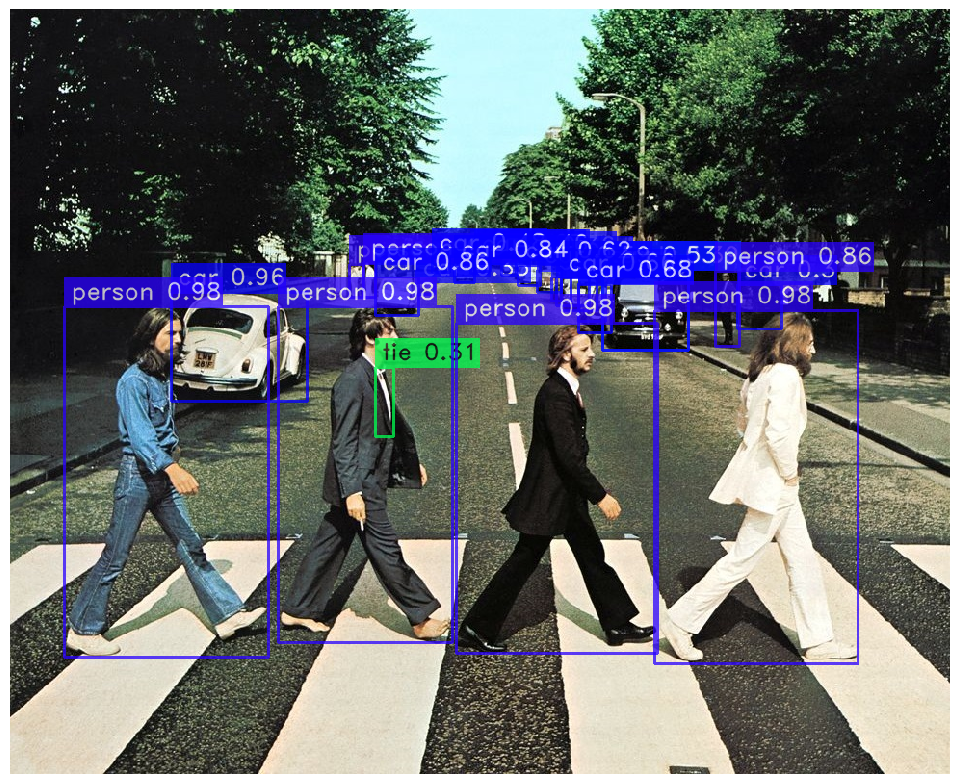

In [ ]:
# Loading model, for medium/low use 'yolo_nas_m' / 'yolo_nas_s'
model_size = "yolo_nas_l"

# If you don't have GPU instance remove .cuda()
yolo_nas = super_gradients.training.models.get(model_size, pretrained_weights="coco").cuda()

img_url = "https://deci-pretrained-models.s3.amazonaws.com/sample_images/beatles-abbeyroad.jpg"
# test and view prediction on single image
model_predictions  = yolo_nas.predict(img_url).show()

In [ ]:
file_paths, widths, heights = test_dataset.values(["filepath", "metadata.width", "metadata.height"])
preds = yolo_nas.predict(file_paths, conf = 0.6)._images_prediction_lst

/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/media/image.py:64: UserWarning: It seems you are using predict() with batch input
  warnings.warn("It seems you are using predict() with batch input")
Predicting Images: 100%|██████████| 5/5 [00:00<00:00,  6.37it/s]


In [ ]:
# Peeking into predictions
print(preds[0])

ImageDetectionPrediction(image=array([[[ 86,  90, 101],
        [133, 137, 148],
        [ 89, 114, 118],
        ...,
        [132, 137, 130],
        [126, 131, 127],
        [ 98,  99, 101]],

       [[ 77,  71,  85],
        [ 89,  87, 100],
        [122, 129, 139],
        ...,
        [121, 126, 122],
        [ 76,  80,  79],
        [ 54,  58,  59]],

       [[176, 185, 194],
        [124, 143, 149],
        [140, 147, 157],
        ...,
        [ 63,  68,  71],
        [ 63,  68,  71],
        [ 65,  70,  73]],

       ...,

       [[195, 205, 207],
        [198, 208, 210],
        [200, 210, 212],
        ...,
        [ 88,  98, 100],
        [ 86,  96,  98],
        [ 83,  93,  95]],

       [[193, 203, 205],
        [198, 208, 210],
        [201, 211, 213],
        ...,
        [ 88,  98, 100],
        [ 87,  97,  99],
        [ 84,  94,  96]],

       [[194, 204, 206],
        [197, 207, 209],
        [198, 208, 210],
        ...,
        [ 85,  95,  97],
        [ 84,  94,

In [ ]:
# create label to lable_name mapping
label_dict = {i:j for i,j in enumerate(preds[0].class_names)}
print(label_dict)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
def convert_bboxes(bboxes, w, h):
  """
  Input:
  bboxes: YOLO boundary boxes of type xyxy
  w : width of image
  h : height of image

  Output:
  COCO format converted boundary boxes
  """
  tmp = np.copy(bboxes[:, 1])
  bboxes[:, 1] = h - bboxes[:, 3]
  bboxes[:, 3] = h - tmp
  bboxes[:, 0]/= w
  bboxes[:, 2]/= w
  bboxes[:, 1]/= h
  bboxes[:, 3]/= h
  bboxes[:, 2] -= bboxes[:, 0]
  bboxes[:, 3] -= bboxes[:, 1]
  bboxes[:, 1] = 1 - (bboxes[:, 1] + bboxes[:, 3])
  return bboxes

In [ ]:
# extract bbox, confidence and labels from predictions
# create FiftyOne's detections object for each image
all_detections = []
for pred in preds:
  img = pred.image
  pred = pred.prediction
  height, width, _ = img.shape

  bboxes, probs, labels = np.array(pred.bboxes_xyxy), pred.confidence, pred.labels.astype(int)
  bboxes = convert_bboxes(bboxes, width, height)

  labels = [label_dict[i] for i in labels]

  detections = []
  for (label, prob, bbox) in zip(labels, probs, bboxes):
    detections.append(fo.Detection(label = label,confidence = prob,bounding_box = bbox))

  all_detections.append(fo.Detections(detections=detections))

print(all_detections[0]) # converted to COCO format

<Detections: {
    'detections': [
        <Detection: {
            'id': '658693d9a6e40816952bb17d',
            'attributes': {},
            'tags': [],
            'label': 'person',
            'bounding_box': [
                0.5200471878051758,
                0.5809987187385559,
                0.07783019542694092,
                0.32219016551971436,
            ],
            'mask': None,
            'confidence': 0.9619140625,
            'index': None,
        }>,
        <Detection: {
            'id': '658693d9a6e40816952bb17e',
            'attributes': {},
            'tags': [],
            'label': 'person',
            'bounding_box': [
                0.7983490824699402,
                0.5821724534034729,
                0.056996822357177734,
                0.24120250344276428,
            ],
            'mask': None,
            'confidence': 0.91162109375,
            'index': None,
        }>,
        <Detection: {
            'id': '658693d9a6e40816952bb17f

In [ ]:
# Visualize the predictions with FiftyOne

dataset = fo.Dataset() # empty dataset
samples = []
for fpath, pred in zip(file_paths, all_detections): #iterate all images and draw detections
  samples.append(fo.Sample(filepath=fpath, pred_objects=pred))

dataset.add_samples(samples)

session = fo.launch_app(dataset)

 100% |█████████████████████| 5/5 [51.3ms elapsed, 0s remaining, 97.4 samples/s]      


[2023-12-23 07:59:19] INFO - utils.py -  100% |█████████████████████| 5/5 [51.3ms elapsed, 0s remaining, 97.4 samples/s]      
